# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url  = 'http://api.openweathermap.org/data/2.5/weather'
url + '?q=%s&units=metric&APPID=%s' % (city, weather_api_key)


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + '?q=%s&units=metric&APPID=%s' % (city, weather_api_key)
    print(city_url)
    
     Log the url, record, and set numbers
    #print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    #try:
        # Parse the JSON and retrieve data
        #city_weather = # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        #city_lat = # YOUR CODE HERE
        #city_lng = # YOUR CODE HERE
        #city_max_temp = # YOUR CODE HERE
        #city_humidity = # YOUR CODE HERE
        #city_clouds = # YOUR CODE HERE
        #city_wind = # YOUR CODE HERE
        #city_country = # YOUR CODE HERE
        #city_date = # YOUR CODE HERE

        # Append the City information into city_data list
        #city_data.append({"City": city, 
         #                 "Lat": city_lat, 
          #                "Lng": city_lng, 
           #               "Max Temp": city_max_temp,
            #              "Humidity": city_humidity,
             #
                #
                #"Cloudiness": city_clouds,
                 #       "Wind Speed": city_wind,
                  #        "Country": city_country,
                   #       "Date": city_date})

    # If an error is experienced, skip the city
   # except:
        #print("City not found. Skipping...")
    #    pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?q=luderitz&units=metric&APPID=263cf61027a35db39e78d3cc02c8a5ef
http://api.openweathermap.org/data/2.5/weather?q=albany&units=metric&APPID=263cf61027a35db39e78d3cc02c8a5ef
http://api.openweathermap.org/data/2.5/weather?q=port-aux-francais&units=metric&APPID=263cf61027a35db39e78d3cc02c8a5ef
http://api.openweathermap.org/data/2.5/weather?q=taiohae&units=metric&APPID=263cf61027a35db39e78d3cc02c8a5ef
http://api.openweathermap.org/data/2.5/weather?q=hopelchen&units=metric&APPID=263cf61027a35db39e78d3cc02c8a5ef
http://api.openweathermap.org/data/2.5/weather?q=vorgashor&units=metric&APPID=263cf61027a35db39e78d3cc02c8a5ef
http://api.openweathermap.org/data/2.5/weather?q=saipan&units=metric&APPID=263cf61027a35db39e78d3cc02c8a5ef
http://api.openweathermap.org/data/2.5/weather?q=sisimiut&units=metric&APPID=263cf61027a35db39e78d3cc02c8a5ef
http://api.openweathermap.org/data/2.5/weather?q=rikaz

In [10]:
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + '?q=%s&units=metric&APPID=%s' % (city, weather_api_key)
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({
            "City": city, 
            "Lat": city_lat, 
            "Lng": city_lng, 
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })
        
    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... {e}")

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Processing Record 0 of Set 13 | luderitz
Processing Record 1 of Set 13 | albany
Processing Record 2 of Set 13 | port-aux-francais
Processing Record 3 of Set 13 | taiohae
City not found. Skipping... 'coord'
Processing Record 4 of Set 13 | hopelchen
Processing Record 5 of Set 13 | vorgashor
Processing Record 6 of Set 13 | saipan
Processing Record 7 of Set 13 | sisimiut
Processing Record 8 of Set 13 | rikaze
Processing Record 9 of Set 13 | lihue
Processing Record 10 of Set 13 | puerto natales
Processing Record 11 of Set 13 | ta`u
Processing Record 12 of Set 13 | bandarbeyla
Processing Record 13 of Set 13 | griffith
Processing Record 14 of Set 13 | vuktyl
Processing Record 15 of Set 13 | tolanaro
Processing Record 16 of Set 13 | kruisfontein
Processing Record 17 of Set 13 | ribeira grande
Processing Record 18 of Set 13 | marsa alam
Processing Record 19 of Set 13 | edinburgh of the seven seas
Processing Record 20 of Set 13 | qaqortoq
Processing Record 21 of Set 13 | amga
Processing Record 2

Processing Record 37 of Set 16 | muynoq
Processing Record 38 of Set 16 | beruniy
Processing Record 39 of Set 16 | lata
Processing Record 40 of Set 16 | hamilton
Processing Record 41 of Set 16 | susuman
Processing Record 42 of Set 16 | queenstown
Processing Record 43 of Set 16 | antsiranana
Processing Record 44 of Set 16 | am djarass
City not found. Skipping... 'coord'
Processing Record 45 of Set 16 | argo
Processing Record 46 of Set 16 | klyuchi
Processing Record 47 of Set 16 | brak
Processing Record 48 of Set 16 | san antonio de pale
Processing Record 49 of Set 16 | coquimbo
Processing Record 0 of Set 17 | ahau
City not found. Skipping... 'coord'
Processing Record 1 of Set 17 | nemuro
Processing Record 2 of Set 17 | sabang
Processing Record 3 of Set 17 | bayganin
Processing Record 4 of Set 17 | preobrazheniye
Processing Record 5 of Set 17 | bangor
Processing Record 6 of Set 17 | fredericton
Processing Record 7 of Set 17 | vadso
Processing Record 8 of Set 17 | el triunfo
Processing Rec

Processing Record 22 of Set 20 | cable beach
City not found. Skipping... 'coord'
Processing Record 23 of Set 20 | arta
Processing Record 24 of Set 20 | luga
Processing Record 25 of Set 20 | zaozersk
Processing Record 26 of Set 20 | scottburgh
Processing Record 27 of Set 20 | khanty-mansiysk
Processing Record 28 of Set 20 | kolonia town
Processing Record 29 of Set 20 | falmouth
Processing Record 30 of Set 20 | taoudenni
Processing Record 31 of Set 20 | naze
Processing Record 32 of Set 20 | abepura
Processing Record 33 of Set 20 | banjar
Processing Record 34 of Set 20 | peace river
Processing Record 35 of Set 20 | stranraer
Processing Record 36 of Set 20 | nikolayevsk-on-amure
Processing Record 37 of Set 20 | antibes
Processing Record 38 of Set 20 | sortavala
Processing Record 39 of Set 20 | zaragoza
Processing Record 40 of Set 20 | nova sintra
Processing Record 41 of Set 20 | karratha
Processing Record 42 of Set 20 | fort william
Processing Record 43 of Set 20 | gornozavodsk
Processing 

Processing Record 3 of Set 24 | rongelap
Processing Record 4 of Set 24 | pimentel
Processing Record 5 of Set 24 | fakenham
Processing Record 6 of Set 24 | betafo
Processing Record 7 of Set 24 | arthur's town
City not found. Skipping... 'coord'
Processing Record 8 of Set 24 | tommot
Processing Record 9 of Set 24 | yallahs
Processing Record 10 of Set 24 | messaad
Processing Record 11 of Set 24 | dossor
Processing Record 12 of Set 24 | mejit
Processing Record 13 of Set 24 | hugo
Processing Record 14 of Set 24 | rockingham
Processing Record 15 of Set 24 | espargos
City not found. Skipping... 'coord'
Processing Record 16 of Set 24 | filingue
Processing Record 17 of Set 24 | mugia
Processing Record 18 of Set 24 | holualoa
Processing Record 19 of Set 24 | kargasok
Processing Record 20 of Set 24 | paragominas
Processing Record 21 of Set 24 | heyuan
Processing Record 22 of Set 24 | tauranga
Processing Record 23 of Set 24 | kill devil hills
Processing Record 24 of Set 24 | arfoud
Processing Reco

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,luderitz,-26.6481,15.1594,12.31,63,99,9.13,NA,1693689376
1,albany,42.6001,-73.9662,26.23,63,100,2.28,US,1693689418
2,port-aux-francais,-49.3500,70.2167,3.93,85,79,14.72,TF,1693689316
3,hopelchen,19.7667,-89.8500,34.32,45,78,2.24,MX,1693689418
4,vorgashor,67.5833,63.9500,9.67,89,57,1.80,RU,1693689418


In [20]:
import os

# Specify the directory path
output_directory = "output_data"

# Create the directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Export the DataFrame to a CSV file within the directory
csv_file_path = os.path.join(output_directory, "cities.csv")
city_data_df.to_csv(csv_file_path, index_label="City_ID")

# Confirm that the CSV file has been saved
print(f"The city weather data has been successfully exported to {csv_file_path}")



The city weather data has been successfully exported to output_data\cities.csv


In [22]:
import pandas as pd

# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,luderitz,-26.6481,15.1594,12.31,63,99,9.13,NaN,1693689376
1,albany,42.6001,-73.9662,26.23,63,100,2.28,US,1693689418
2,port-aux-francais,-49.3500,70.2167,3.93,85,79,14.72,TF,1693689316
3,hopelchen,19.7667,-89.8500,34.32,45,78,2.24,MX,1693689418
4,vorgashor,67.5833,63.9500,9.67,89,57,1.80,RU,1693689418


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

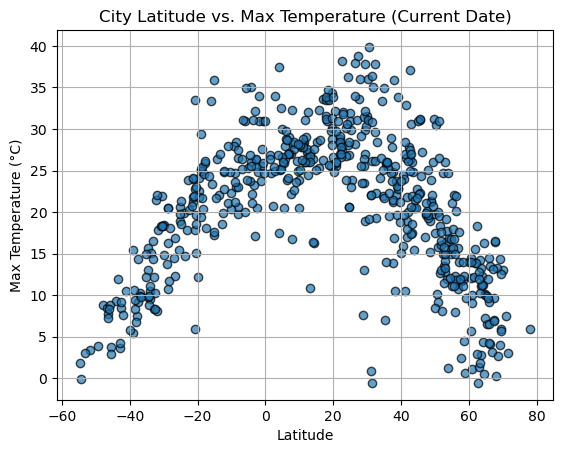

In [23]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Create the scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.7)

# Set the title and labels
plt.title("City Latitude vs. Max Temperature (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")

# Add gridlines
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show the plot
plt.show()


#### Latitude Vs. Humidity

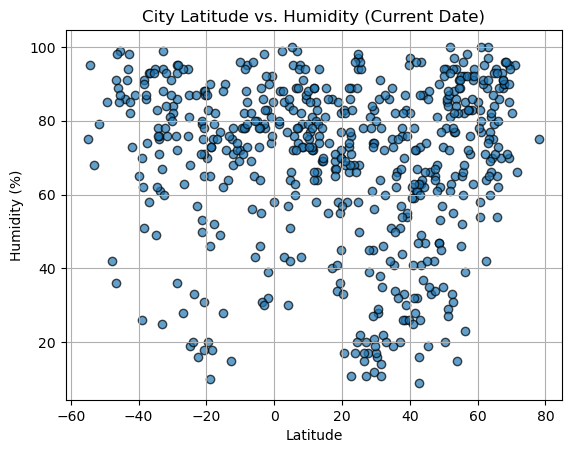

In [24]:
# Create the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.7)

# Set the title and labels
plt.title("City Latitude vs. Humidity (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Add gridlines
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show the plot
plt.show()


#### Latitude Vs. Cloudiness

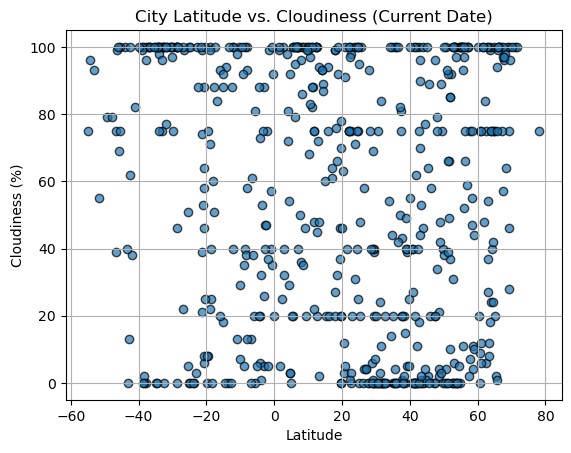

In [25]:
# Create the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.7)

# Set the title and labels
plt.title("City Latitude vs. Cloudiness (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Add gridlines
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show the plot
plt.show()


#### Latitude vs. Wind Speed Plot

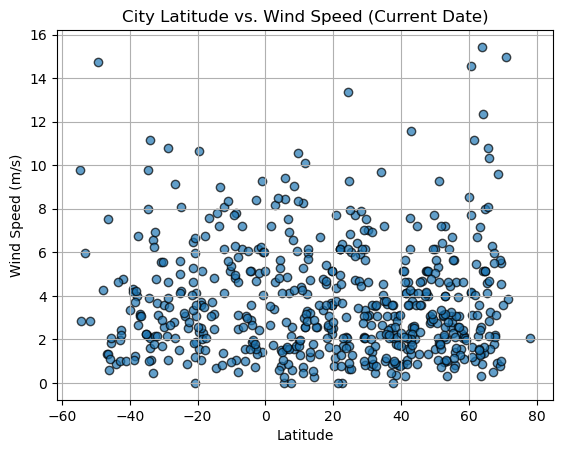

In [26]:
# Create the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.7)

# Set the title and labels
plt.title("City Latitude vs. Wind Speed (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Add gridlines
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show the plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Import necessary libraries
from scipy.stats import linregress

# Define a function for creating linear regression plots and calculations
def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line
    regress_values = x_values * slope + intercept
    
    # Create the linear regression equation
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create the scatter plot
    plt.scatter(x_values, y_values, marker="o", edgecolors="black")
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-", label=line_eq)
    
    # Annotate the equation on the plot
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Label the plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Display the correlation coefficient
    print(f"The correlation coefficient (r-value) is: {r_value}")
    
    # Show the plot
    plt.legend()
    plt.show()


The correlation coefficient (r-value) is: -0.06260643526591134


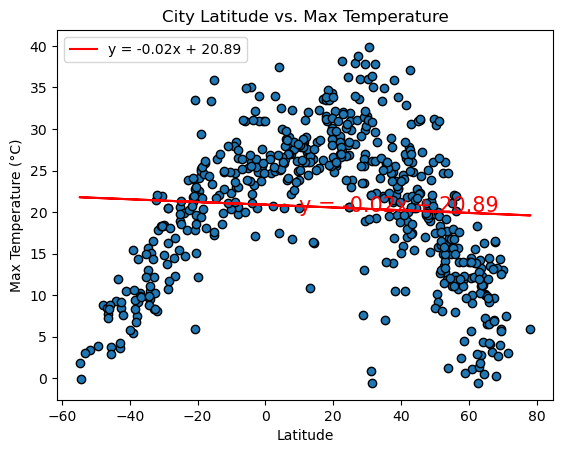

In [29]:
plot_linear_regression(city_data_df["Lat"], city_data_df["Max Temp"], "Latitude", "Max Temperature (°C)", "City Latitude vs. Max Temperature", (10, 20))


In [30]:
# Create a DataFrame with Northern Hemisphere data
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,-73.9662,26.23,63,100,2.28,US,1693689418
3,hopelchen,19.7667,-89.8500,34.32,45,78,2.24,MX,1693689418
4,vorgashor,67.5833,63.9500,9.67,89,57,1.80,RU,1693689418
5,saipan,15.1355,145.7010,28.39,89,20,2.57,MP,1693689259
6,sisimiut,66.9395,-53.6735,3.13,70,100,6.27,GL,1693689418


In [31]:
# Create a DataFrame with Southern Hemisphere data
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,luderitz,-26.6481,15.1594,12.31,63,99,9.13,NaN,1693689376
2,port-aux-francais,-49.3500,70.2167,3.93,85,79,14.72,TF,1693689316
9,puerto natales,-51.7236,-72.4875,3.44,79,55,2.86,CL,1693689419
10,ta`u,-14.2336,-169.5144,26.43,72,94,7.81,AS,1693689316
14,tolanaro,-25.0319,46.9987,20.62,87,0,5.60,MG,1693689419


###  Temperature vs. Latitude Linear Regression Plot

The correlation coefficient (r-value) is: -0.6991581700156435


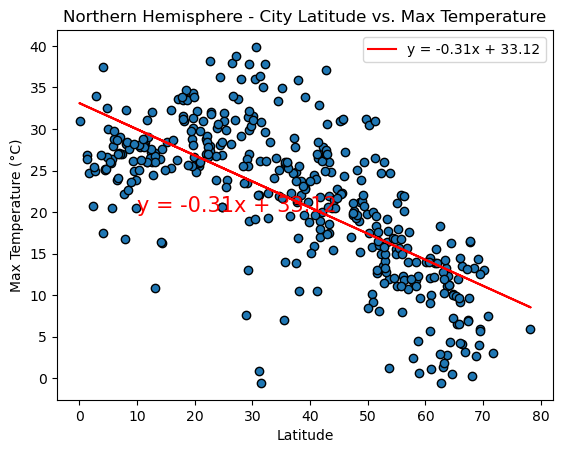

In [32]:
# Perform linear regression on Northern Hemisphere data (Latitude vs. Max Temperature)
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temperature (°C)", "Northern Hemisphere - City Latitude vs. Max Temperature", (10, 20))


The correlation coefficient (r-value) is: 0.8521832190952108


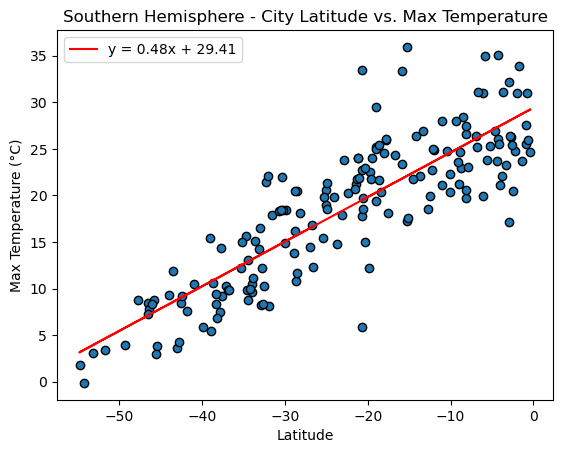

In [33]:
# Perform linear regression on Southern Hemisphere data (Latitude vs. Max Temperature)
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature (°C)", "Southern Hemisphere - City Latitude vs. Max Temperature", (-30, 50))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The correlation coefficient (r-value) is: 0.09388555370919179


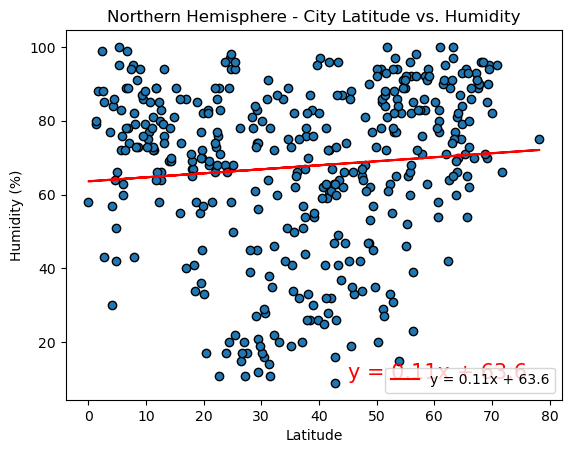

In [34]:
# Perform linear regression on Northern Hemisphere data (Humidity vs. Latitude)
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Northern Hemisphere - City Latitude vs. Humidity", (45, 10))


The correlation coefficient (r-value) is: -0.11953668881897095


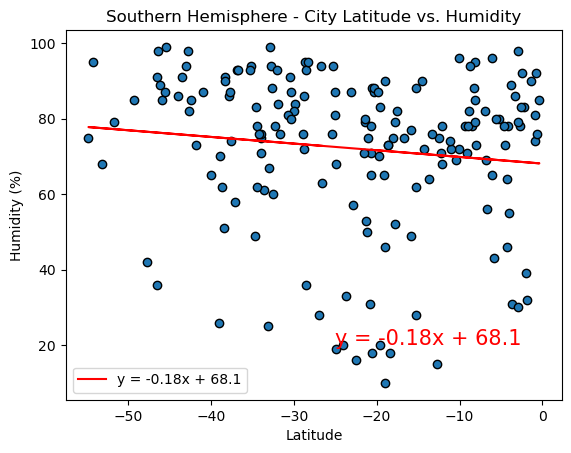

In [35]:
# Perform linear regression on Southern Hemisphere data (Humidity vs. Latitude)
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Southern Hemisphere - City Latitude vs. Humidity", (-25, 20))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The correlation coefficient (r-value) is: -0.024282139906314924


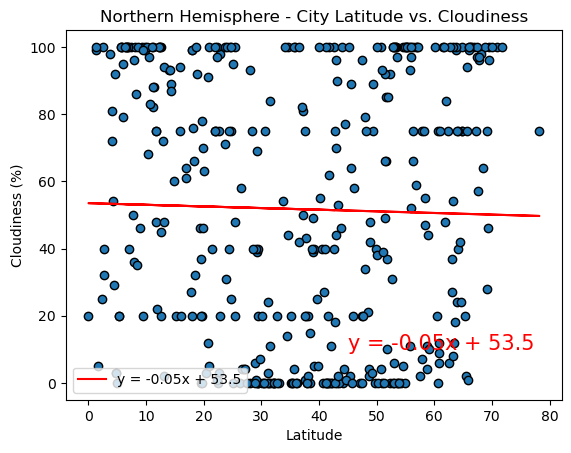

In [36]:
# Perform linear regression on Northern Hemisphere data (Cloudiness vs. Latitude)
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Northern Hemisphere - City Latitude vs. Cloudiness", (45, 10))


The correlation coefficient (r-value) is: -0.26321841597285545


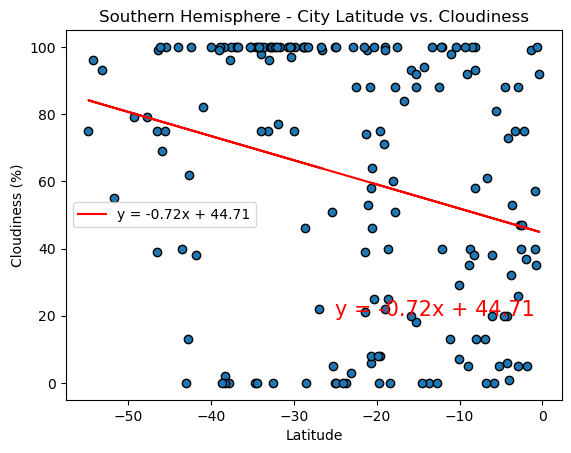

In [37]:
# Perform linear regression on Southern Hemisphere data (Cloudiness vs. Latitude)
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Southern Hemisphere - City Latitude vs. Cloudiness", (-25, 20))


In both the Northern and Southern Hemispheres, there is no strong linear relationship between latitude and cloudiness. The scattered data points on the linear regression plots indicate that cloudiness is not significantly influenced by latitude, suggesting that cloud cover varies independently of geographical location. (Bard)

### Wind Speed vs. Latitude Linear Regression Plot

The correlation coefficient (r-value) is: 0.03188212664609797


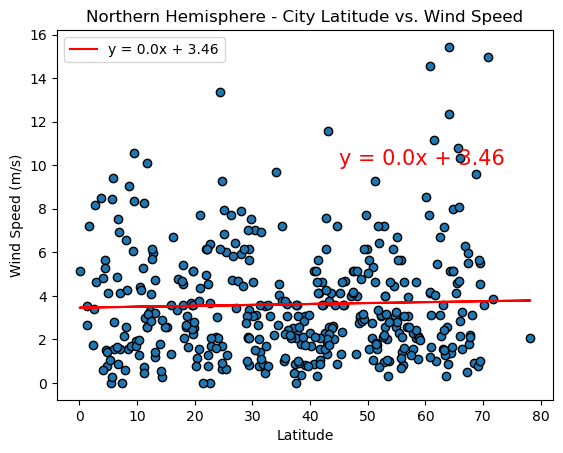

In [38]:
# Perform linear regression on Northern Hemisphere data (Wind Speed vs. Latitude)
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", "Northern Hemisphere - City Latitude vs. Wind Speed", (45, 10))


The correlation coefficient (r-value) is: 0.043754416677029985


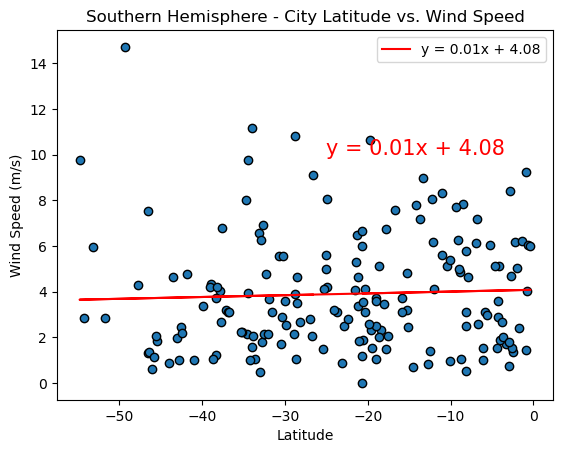

In [39]:
# Perform linear regression on Southern Hemisphere data (Wind Speed vs. Latitude)
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", "Southern Hemisphere - City Latitude vs. Wind Speed", (-25, 10))


**Discussion about the linear relationship:** 
In both the Northern and Southern Hemispheres, there is no strong linear relationship between latitude and wind speed. The scattered data points on the linear regression plots indicate that wind speed does not significantly vary with latitude, suggesting that wind patterns are influenced by other factors rather than geographical location. (Bard)